# Project Title: Scania Truck Failures
## Domain: Transportation

### Problem Statement:
The Air Pressure System (APS) is a critical component of a heavy-duty vehicle that uses compressed air to force a piston to provide pressure to the brake pads, slowing the vehicle down. The benefits of using an APS instead of a hydraulic system are the easy availability and long-term sustainability of natural air. This is a Binary Classification problem, in which the affirmative class indicates that the failure was caused by a certain component of the APS, while the negative class indicates that the failure was caused by something else.

### Approach:
The approach involves classical machine learning tasks such as Data Exploration, Data Cleaning, Feature Engineering, Model Building, and Model Testing. Various machine learning algorithms will be experimented with to find the best fit for the above case.

### Results:
The goal is to build a solution that is able to predict whether a failure of a Scania Truck component is related to the air pressure system (APS) or not.

### Dataset Link:
[Scania Truck Failures Dataset](https://archive.ics.uci.edu/dataset/421/aps+failure+at+scania+trucks)


In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#for qq plot
import scipy.stats as stats

#for model building machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

#for handling imbalance dataset
from imblearn.under_sampling import NearMiss

#for handling missing values
import missingno as mn



In [2]:
train_data = pd.read_csv('/content/aps_failure_training_set.csv')
train_data.head()

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0   neg   76698     na  2130706438    280      0      0      0      0      0   
1   neg   33058     na           0     na      0      0      0      0      0   
2   neg   41040     na         228    100      0      0      0      0      0   
3   neg      12      0          70     66      0     10      0      0      0   
4   neg   60874     na        1368    458      0      0      0      0      0   

   ...   ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  ee_008 ee_009 ef_000  \
0  ...  1240520  493384  721044  469792  339156  157956   73224      0      0   
1  ...   421400  178064  293306  245416  133654   81140   97576   1500      0   
2  ...   277378  159812  423992  409564  320746  158022   95128    514      0   
3  ...      240      46      58      44      10       0       0      0      4   
4  ...   622012  229790  405298  347188  286954  311560  433954   1218      0   

  eg_000  
0      0  
1      0  
2      0  
3     32  
4      0  

[5 rows x 171 columns]

In [3]:
test_data = pd.read_csv('/content/aps_failure_test_set.csv')
test_data.head()

class  aa_000 ab_000 ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  ...  \
0   neg      60      0     20     12      0      0      0      0      0  ...   
1   neg      82      0     68     40      0      0      0      0      0  ...   
2   neg   66002      2    212    112      0      0      0      0      0  ...   
3   neg   59816     na   1010    936      0      0      0      0      0  ...   
4   neg    1814     na    156    140      0      0      0      0      0  ...   

   ee_002  ee_003  ee_004  ee_005   ee_006  ee_007  ee_008 ee_009 ef_000  \
0    1098     138     412     654       78      88       0      0      0   
1    1068     276    1620     116       86     462       0      0      0   
2  495076  380368  440134  269556  1315022  153680     516      0      0   
3  540820  243270  483302  485332   431376  210074  281662   3232      0   
4    7646    4144   18466   49782     3176     482      76      0      0   

  eg_000  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 171 columns]

In [4]:
train_data.shape, test_data.shape

((60000, 171), (16000, 171))

## Combine Train & Test Data

In [5]:

df = pd.concat([train_data, test_data], axis=0, ignore_index = True)
df.head()

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0   neg   76698     na  2130706438    280      0      0      0      0      0   
1   neg   33058     na           0     na      0      0      0      0      0   
2   neg   41040     na         228    100      0      0      0      0      0   
3   neg      12      0          70     66      0     10      0      0      0   
4   neg   60874     na        1368    458      0      0      0      0      0   

   ...   ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  ee_008 ee_009 ef_000  \
0  ...  1240520  493384  721044  469792  339156  157956   73224      0      0   
1  ...   421400  178064  293306  245416  133654   81140   97576   1500      0   
2  ...   277378  159812  423992  409564  320746  158022   95128    514      0   
3  ...      240      46      58      44      10       0       0      0      4   
4  ...   622012  229790  405298  347188  286954  311560  433954   1218      0   

  eg_000  
0      0  
1      0  
2      0  
3     32  
4      0  

[5 rows x 171 columns]

In [6]:
df.shape

(76000, 171)

In [7]:
df.index

RangeIndex(start=0, stop=76000, step=1)

## Exploratory Data Analysis

In [8]:
df[df['ab_000']=='na']

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg   76698     na  2130706438    280      0      0      0      0   
1       neg   33058     na           0     na      0      0      0      0   
2       neg   41040     na         228    100      0      0      0      0   
4       neg   60874     na        1368    458      0      0      0      0   
5       neg   38312     na  2130706432    218      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
75993   neg    2146     na  2130706432    300      0      0      0      0   
75994   pos  215220     na         414      0      0      0      0      0   
75995   neg   81852     na  2130706432    892      0      0      0      0   
75997   neg   79636     na        1670   1518      0      0      0      0   
75998   neg     110     na          36     32      0      0      0      0   

       ag_002  ...   ee_002  ee_003   ee_004   ee_005   ee_006  ee_007  \
0           0  ...  1240520  493384   721044   469792   339156  157956   
1           0  ...   421400  178064   293306   245416   133654   81140   
2           0  ...   277378  159812   423992   409564   320746  158022   
4           0  ...   622012  229790   405298   347188   286954  311560   
5           0  ...   388574  288278   900430   300412     1534     338   
...       ...  ...      ...     ...      ...      ...      ...     ...   
75993       0  ...    11102    5980    16934    65806      268      54   
75994  149300  ...  1127092  495454  1345792  3078658  3278768  337916   
75995       0  ...   632658  273242   510354   373918   349840  317840   
75997       0  ...   806832  449962   778826   581558   375498  222866   
75998       0  ...      588     210      180      544     1004    1338   

       ee_008 ee_009 ef_000 eg_000  
0       73224      0      0      0  
1       97576   1500      0      0  
2       95128    514      0      0  
4      433954   1218      0      0  
5         856      0      0      0  
...       ...    ...    ...    ...  
75993       6      0      0      0  
75994    6154      0      0      0  
75995  960024  25566      0      0  
75997  358934  19548      0      0  
75998      74      0      0      0  

[58692 rows x 171 columns]

In [9]:
df.replace('na', np.nan, inplace=True)

In [10]:
df.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

In [11]:
import numpy as np
# Assuming 'df' is your DataFrame

for feature in df.columns[1:]:
    try:
        df[feature] = df[feature].astype(np.int64)
    except ValueError:
        # Handle non-numeric values (e.g., 'aa_000') by replacing them with NaN
        df[feature] = pd.to_numeric(df[feature], errors='coerce')

# Now your DataFrame should have appropriate numeric data types


In [12]:
df.describe()

aa_000        ab_000        ac_000        ad_000        ae_000  \
count  7.600000e+04  17308.000000  7.173900e+04  5.715800e+04  72810.000000   
mean   6.115976e+04      0.725560  3.564398e+08  1.506300e+05      6.736959   
std    2.647366e+05      3.311913  7.952530e+08  3.590593e+07    153.446469   
min    0.000000e+00      0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    8.600000e+02      0.000000  1.600000e+01  2.400000e+01      0.000000   
50%    3.081300e+04      0.000000  1.540000e+02  1.280000e+02      0.000000   
75%    4.884000e+04      0.000000  9.700000e+02  4.300000e+02      0.000000   
max    4.294967e+07    204.000000  2.130707e+09  8.584298e+09  21050.000000   

             af_000        ag_000        ag_001        ag_002        ag_003  \
count  72810.000000  7.514000e+04  7.514000e+04  7.514000e+04  7.514000e+04   
mean      10.836314  2.004306e+02  1.204761e+03  9.697328e+03  9.364902e+04   
std      201.594853  1.843612e+04  5.099091e+04  1.718996e+05  8.244157e+05   
min        0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%        0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%        0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%        0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    20070.000000  3.376892e+06  1.047252e+07  1.914916e+07  7.305747e+07   

       ...        ee_002        ee_003        ee_004        ee_005  \
count  ...  7.513700e+04  7.513700e+04  7.513700e+04  7.513700e+04   
mean   ...  4.495763e+05  2.132460e+05  4.506478e+05  4.006204e+05   
std    ...  1.177226e+06  5.518865e+05  1.189909e+06  1.151635e+06   
min    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    ...  2.986000e+03  1.184000e+03  2.730000e+03  3.646000e+03   
50%    ...  2.354480e+05  1.126720e+05  2.230020e+05  1.909860e+05   
75%    ...  4.386740e+05  2.184100e+05  4.676340e+05  4.032900e+05   
max    ...  7.793393e+07  3.775839e+07  9.715238e+07  5.743524e+07   

             ee_006        ee_007        ee_008        ee_009        ef_000  \
count  7.513700e+04  7.513700e+04  7.513700e+04  7.513700e+04  72514.000000   
mean   3.378689e+05  3.475611e+05  1.398968e+05  8.424984e+03      0.085197   
std    1.097909e+06  1.707593e+06  4.692327e+05  4.875440e+04      4.179600   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00      0.000000   
25%    5.300000e+02  1.120000e+02  0.000000e+00  0.000000e+00      0.000000   
50%    9.353600e+04  4.126000e+04  3.862000e+03  0.000000e+00      0.000000   
75%    2.761800e+05  1.680460e+05  1.395000e+05  2.000000e+03      0.000000   
max    4.215944e+07  1.195801e+08  1.926740e+07  4.570398e+06    482.000000   

             eg_000  
count  72515.000000  
mean       0.219044  
std       10.237051  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max     1720.000000  

[8 rows x 170 columns]

In [13]:
df.duplicated().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 99.2+ MB


#### Handling null values

In [15]:
df.isnull().sum()

class         0
aa_000        0
ab_000    58692
ac_000     4261
ad_000    18842
          ...  
ee_007      863
ee_008      863
ee_009      863
ef_000     3486
eg_000     3485
Length: 171, dtype: int64

In [16]:
#30 features with highest null values
null_30 = df.isnull().sum().sort_values(ascending=False).head(30)
null_30

br_000    62393
bq_000    61703
bp_000    60461
bo_000    58709
cr_000    58692
ab_000    58692
bn_000    55722
bm_000    50095
bl_000    34503
bk_000    29128
cg_000    18842
co_000    18842
ad_000    18842
ch_000    18842
cf_000    18842
da_000    17526
dc_000    17526
db_000    17526
cu_000    17526
cz_000    17526
cy_000    17526
cv_000    17526
ct_000    17526
cx_000    17526
ec_00     12883
cm_000    12455
cl_000    12012
ed_000    12012
ak_000     5598
ca_000     5562
dtype: int64

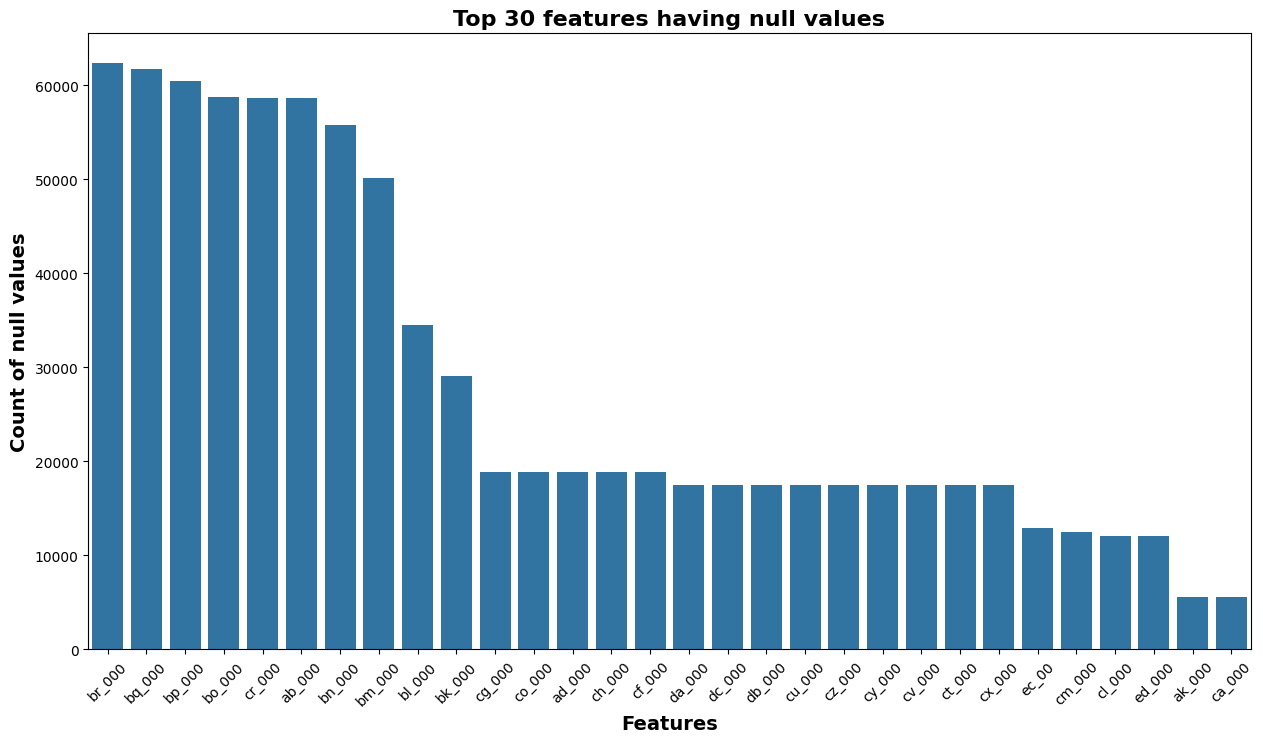

In [17]:
#plotting the top features having nulls
plt.figure(figsize=(15,8))
sns.barplot(y= null_30, x=null_30.index)
plt.xticks(rotation=45)
plt.ylabel("Count of null values", fontsize = 14, fontweight = "bold")
plt.xlabel("Features", fontsize = 14, fontweight = "bold")
plt.title("Top 30 features having null values", fontsize=16, fontweight='bold', y=1)
plt.show()

<Axes: >

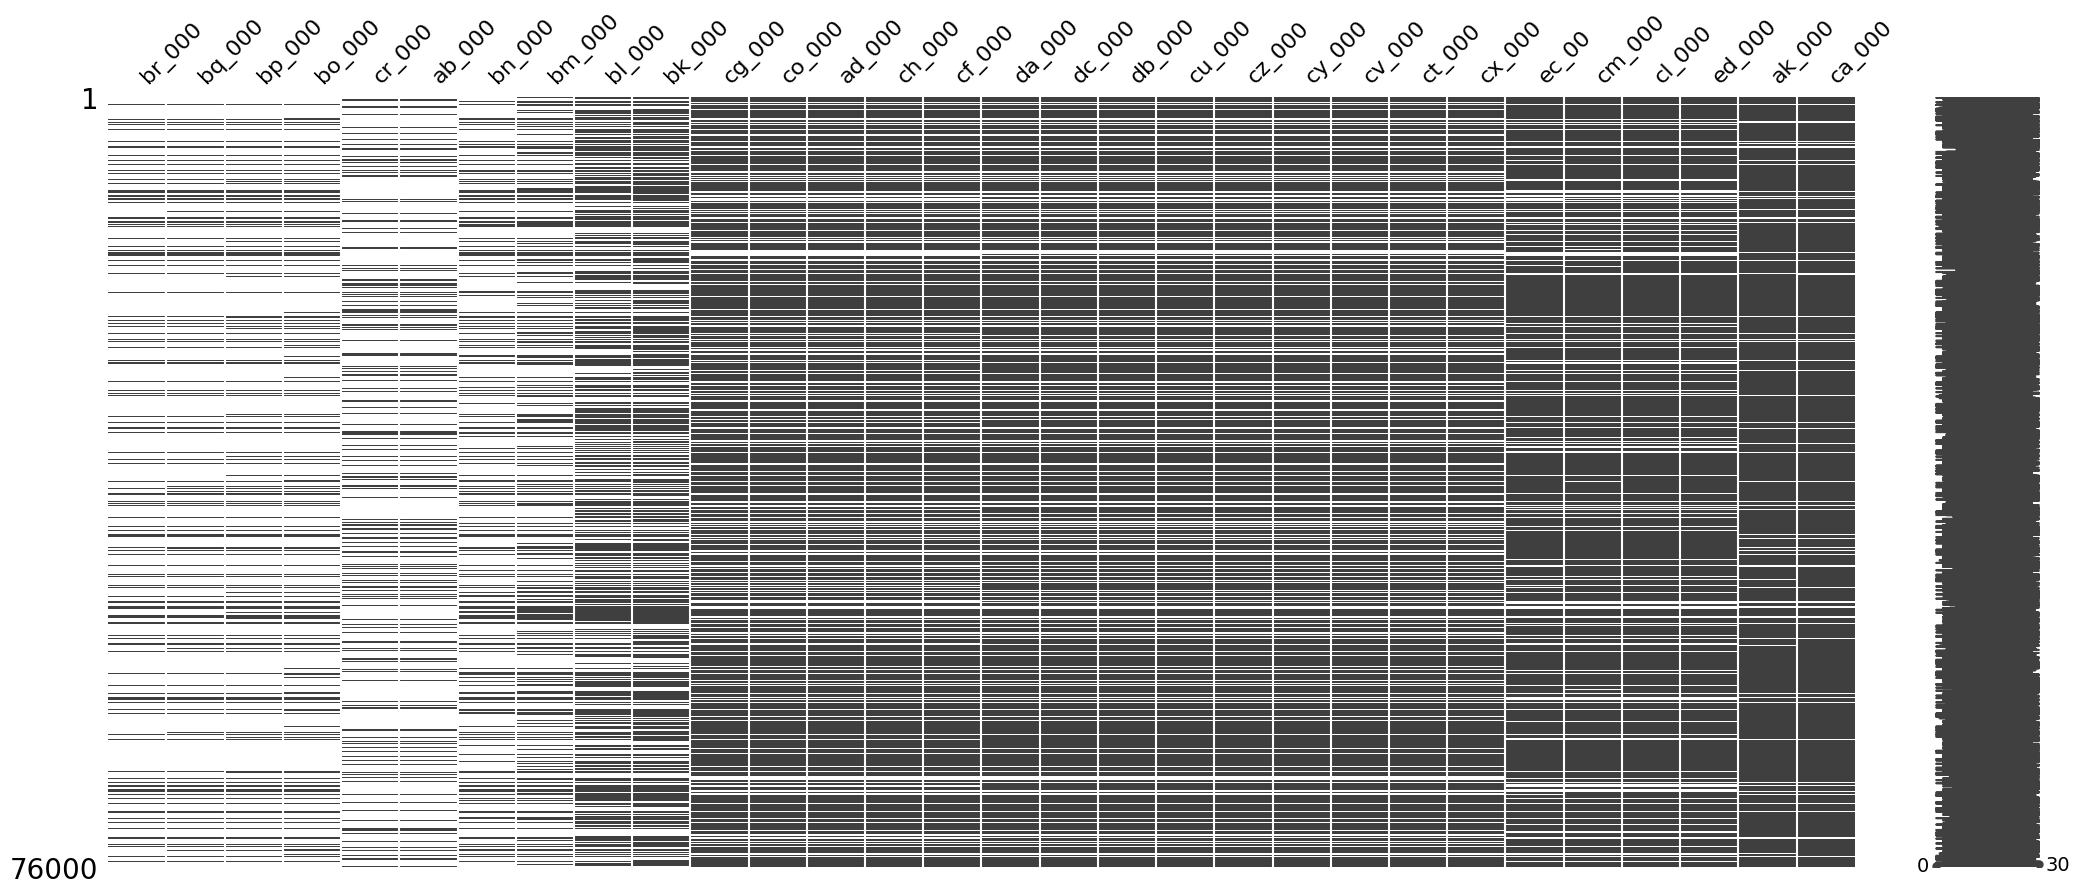

In [18]:
mn.matrix(df[null_30.index])

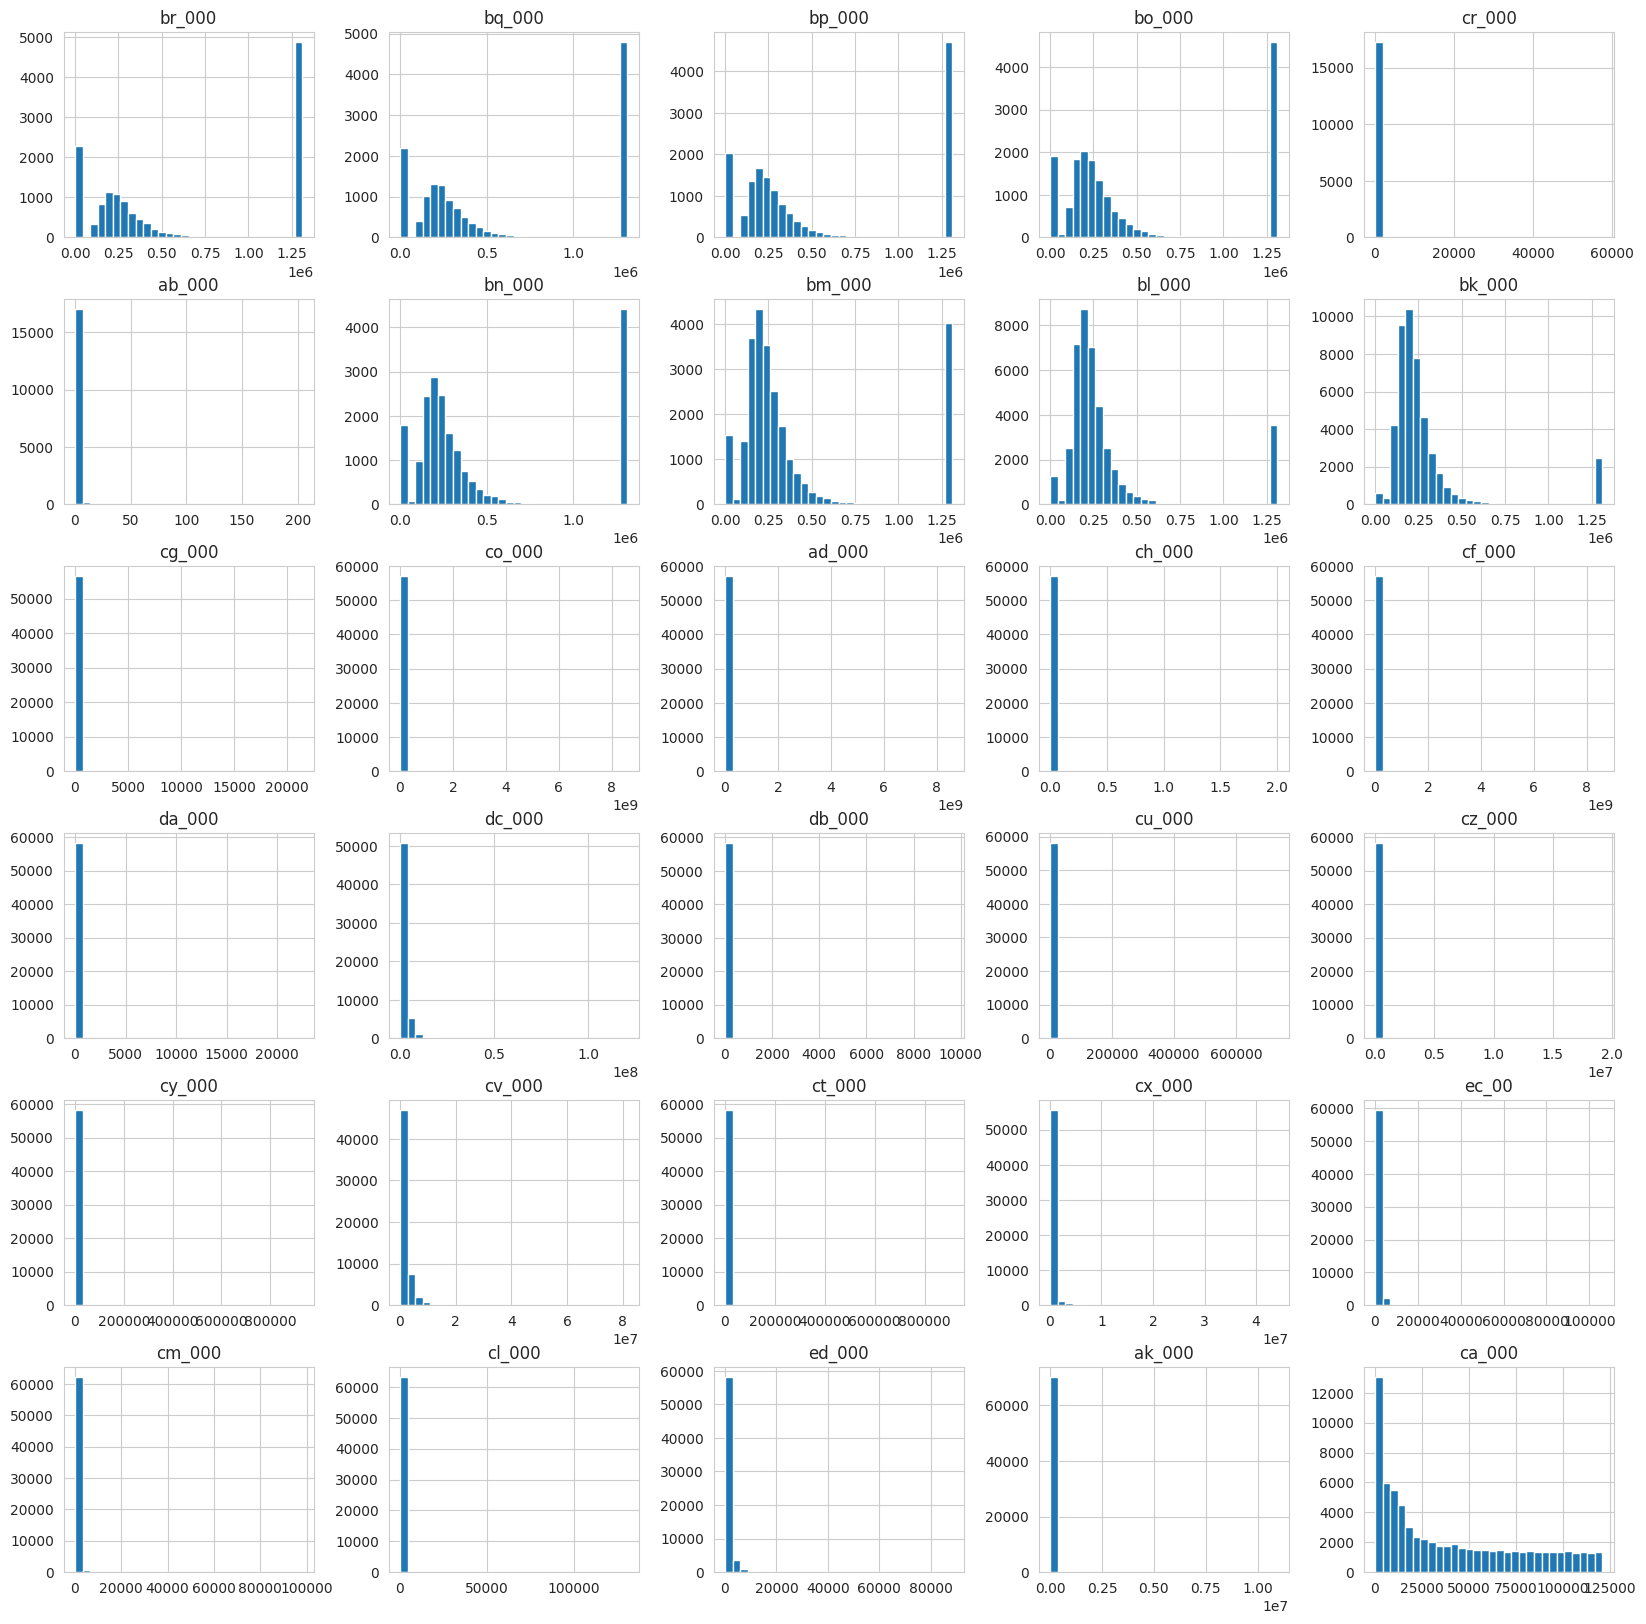

In [19]:
#Check data distribution
sns.set_style('whitegrid')
df[null_30.index].hist(figsize=(20,20), bins=30)
plt.show()

In [20]:
for feature in df.columns[2:]:
    df[feature] = df[feature].fillna(df[feature].median())

In [21]:
#check null values
df.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

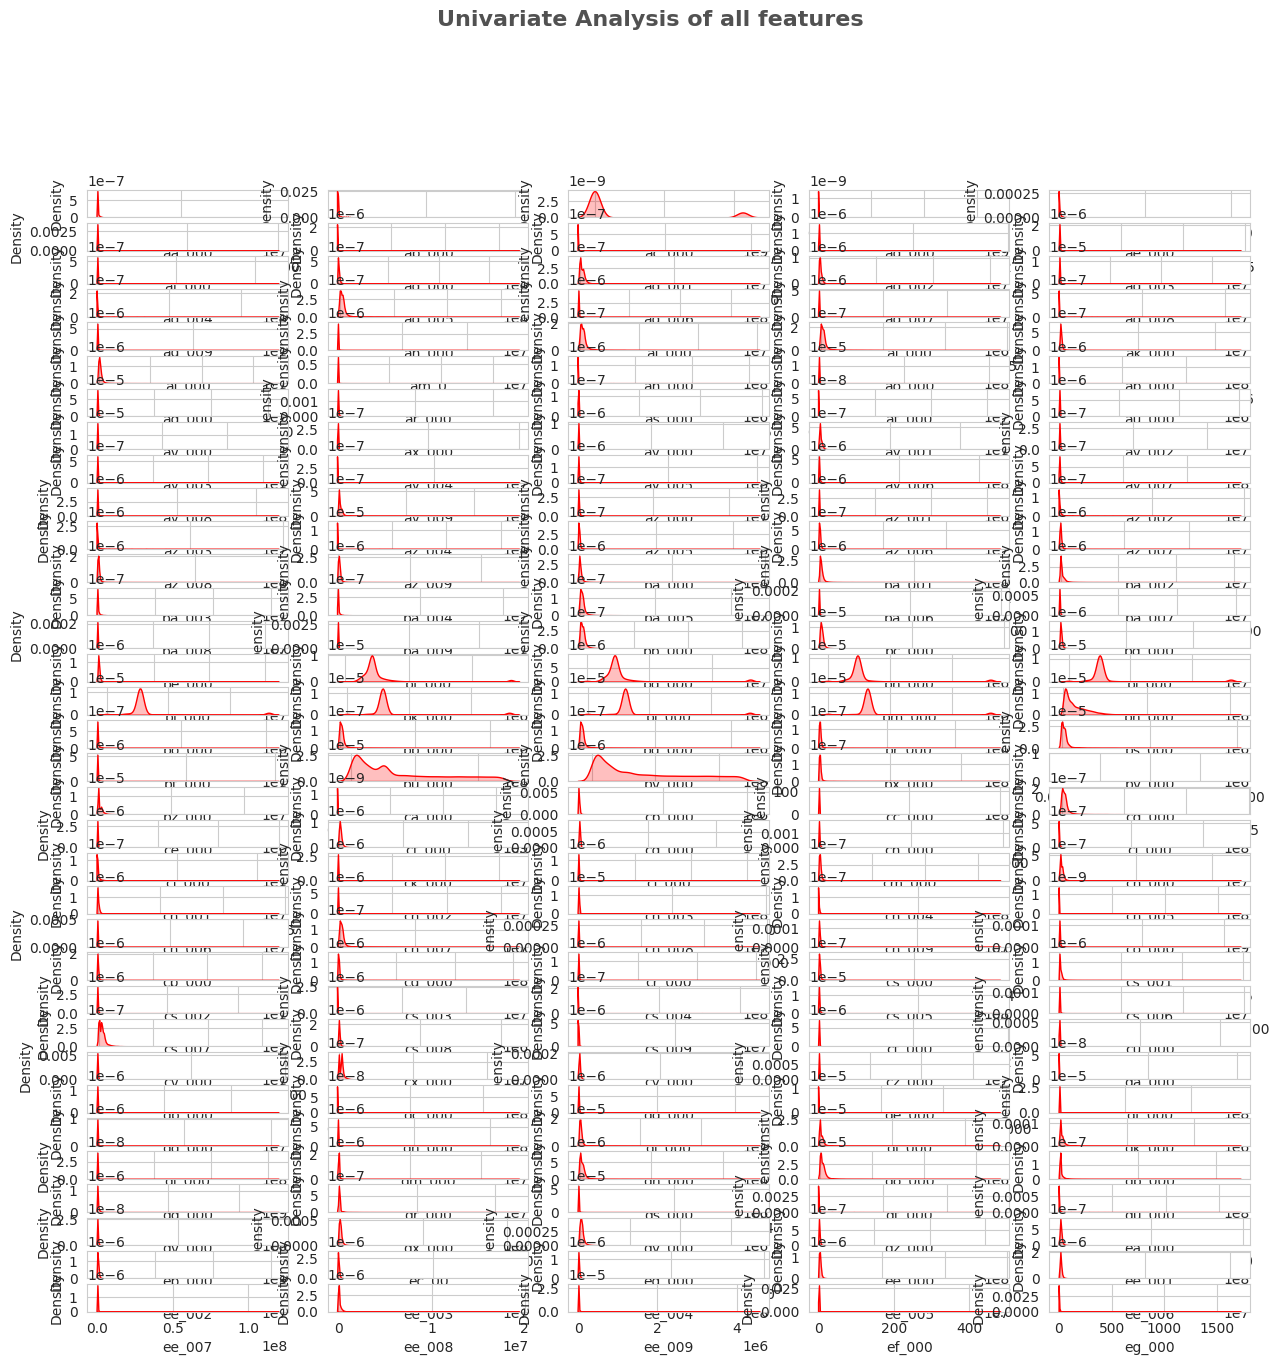

In [41]:
numeric_features = [feature for feature in df.columns if feature not in ['class']]

plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of all features", fontsize=16, fontweight='bold', alpha=0.8, y=1.)

for i in range(0,len(numeric_features)):
    plt.subplot(35,5,i+1)
    sns.kdeplot(df[numeric_features[i]],shade=True, color='r')
    #plt.xlabel(numeric_features[i])
    plt.tight_layout()


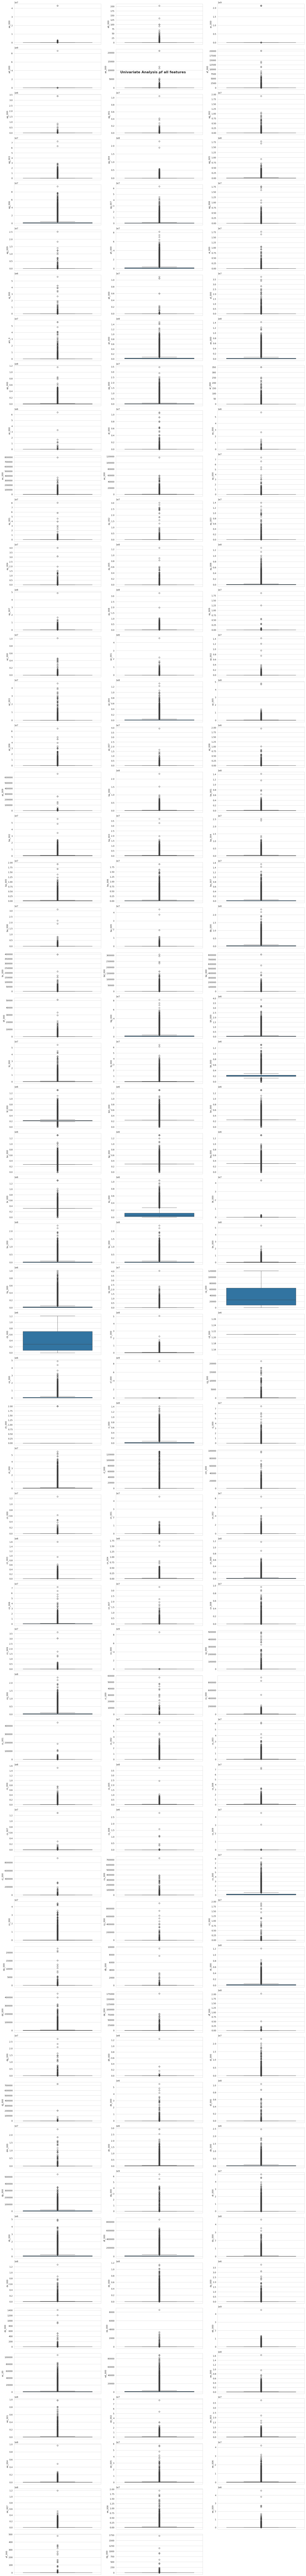

In [42]:
#Check the outliers

plt.figure(figsize=(20,250))
plt.suptitle("Univariate Analysis of all features", fontsize=16, fontweight='bold')

for i in range(0,len(numeric_features)):
    plt.subplot(85,3,i+1)
    sns.boxplot(df[numeric_features[i]])
    plt.tight_layout()

In [22]:
df1 = df.copy()

## Handling outliers

In [23]:
#Function to cap outlier
def remover_outlier(in_data,in_col):
    #find iqr
    first_quantile = in_data[in_col].quantile(0.25)
    third_quantile = in_data[in_col].quantile(0.75)
    iqr = third_quantile - first_quantile
    upper_limit = third_quantile + 1.5 * iqr
    lower_limit = first_quantile - 1.5 * iqr
    in_data.loc[(in_data[in_col]>upper_limit), in_col] = upper_limit
    in_data.loc[(in_data[in_col]<lower_limit), in_col] = lower_limit
    return in_data

In [24]:
for feature in numeric_features:
    df1 = remover_outlier(df1, feature)

NameError: name 'numeric_features' is not defined

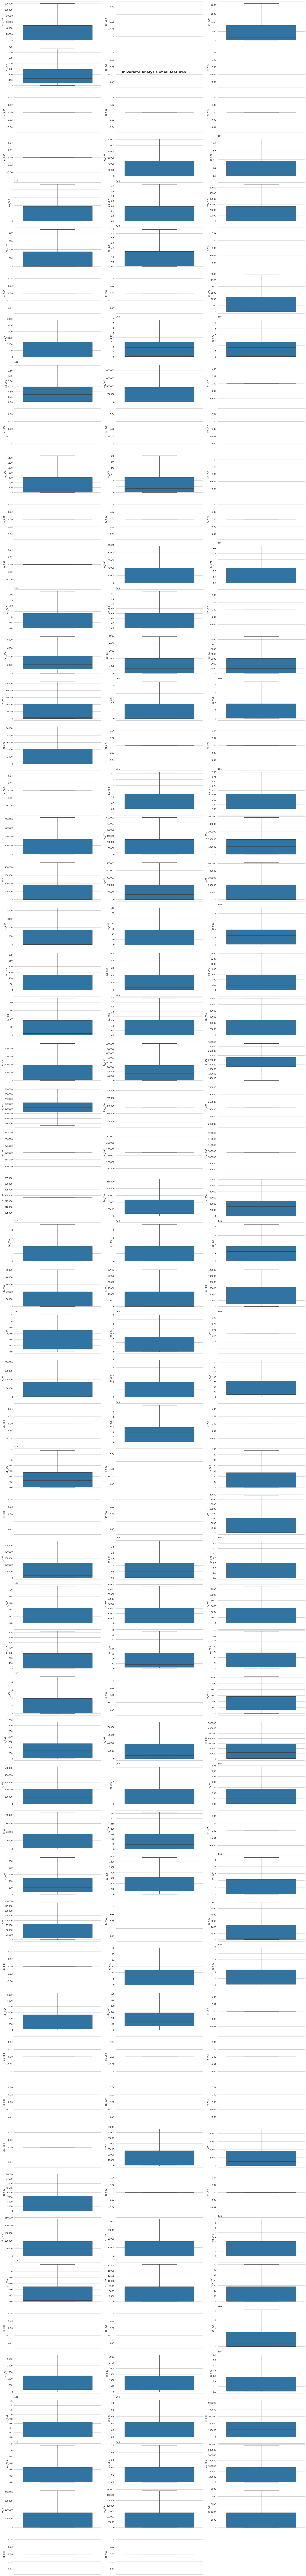

In [46]:
plt.figure(figsize=(20,250))
plt.suptitle("Univariate Analysis of all features", fontsize=16, fontweight='bold')

for i in range(0,len(numeric_features)):
    plt.subplot(85,3,i+1)
    sns.boxplot(df1[numeric_features[i]])
    plt.tight_layout()

## Correlations

In [25]:
label_encoder = LabelEncoder()
df1['class'] = label_encoder.fit_transform(df['class'])

In [26]:
df1['class'].value_counts()

class
0    74625
1     1375
Name: count, dtype: int64

In [27]:
df1.corr()

class    aa_000    ab_000    ac_000    ad_000    ae_000    af_000  \
class   1.000000  0.323466  0.019554 -0.054178 -0.000490  0.002886  0.010961   
aa_000  0.323466  1.000000  0.009953 -0.037851 -0.000801  0.023778  0.033524   
ab_000  0.019554  0.009953  1.000000 -0.002489 -0.000372  0.034129  0.053156   
ac_000 -0.054178 -0.037851 -0.002489  1.000000 -0.001568 -0.004005 -0.009773   
ad_000 -0.000490 -0.000801 -0.000372 -0.001568  1.000000 -0.000156 -0.000190   
...          ...       ...       ...       ...       ...       ...       ...   
ee_007  0.176693  0.356954  0.010747 -0.048884 -0.000722  0.034168  0.043477   
ee_008  0.239035  0.259626 -0.026319 -0.004806 -0.001060 -0.009518 -0.012225   
ee_009  0.118784  0.133790 -0.017057  0.012019 -0.000622 -0.007330 -0.009004   
ef_000  0.011032  0.005648  0.051733 -0.006200 -0.000072  0.063622  0.093517   
eg_000  0.009306  0.009239  0.077262  0.016273 -0.000076  0.030893  0.044417   

          ag_000    ag_001    ag_002  ...    ee_002    ee_003    ee_004  \
class   0.018167  0.156964  0.336246  ...  0.464854  0.454115  0.442487   
aa_000  0.011686  0.076387  0.195179  ...  0.414098  0.419884  0.409628   
ab_000 -0.000206  0.006841  0.024010  ... -0.000332  0.010885  0.001855   
ac_000  0.015077 -0.007137 -0.022578  ... -0.047540 -0.041136 -0.040610   
ad_000 -0.000038 -0.000085 -0.000202  ... -0.001343 -0.001350 -0.001318   
...          ...       ...       ...  ...       ...       ...       ...   
ee_007  0.007652  0.067999  0.181955  ...  0.442405  0.433122  0.419859   
ee_008  0.000102  0.005364  0.009142  ...  0.442837  0.470860  0.448713   
ee_009 -0.001082 -0.003530 -0.009065  ...  0.224864  0.236117  0.221077   
ef_000 -0.000086  0.000960  0.005119  ...  0.002271  0.008862  0.001752   
eg_000  0.000145  0.003464  0.012881  ...  0.002475  0.005299  0.005932   

          ee_005    ee_006    ee_007    ee_008    ee_009    ef_000    eg_000  
class   0.501814  0.424070  0.176693  0.239035  0.118784  0.011032  0.009306  
aa_000  0.419753  0.425622  0.356954  0.259626  0.133790  0.005648  0.009239  
ab_000  0.012073  0.016158  0.010747 -0.026319 -0.017057  0.051733  0.077262  
ac_000 -0.041436 -0.047661 -0.048884 -0.004806  0.012019 -0.006200  0.016273  
ad_000 -0.001092 -0.001054 -0.000722 -0.001060 -0.000622 -0.000072 -0.000076  
...          ...       ...       ...       ...       ...       ...       ...  
ee_007  0.380362  0.543650  1.000000  0.227539  0.063395 -0.001551 -0.000363  
ee_008  0.394357  0.366141  0.227539  1.000000  0.690270 -0.005663 -0.002474  
ee_009  0.184135  0.158955  0.063395  0.690270  1.000000 -0.003312 -0.001216  
ef_000  0.025645  0.003997 -0.001551 -0.005663 -0.003312  1.000000  0.222595  
eg_000  0.007154  0.013898 -0.000363 -0.002474 -0.001216  0.222595  1.000000  

[171 rows x 171 columns]

## Handling Imbalance dataset

In [28]:
x = df1.drop('class', axis=1)
y = df1['class']

In [29]:
nm = NearMiss()
x_imb, y_imb = nm.fit_resample(x,y)

In [30]:
print("Original dataset :\n", y.value_counts())
print("Resampled dataset :\n", y_imb.value_counts())

Original dataset :
 class
0    74625
1     1375
Name: count, dtype: int64
Resampled dataset :
 class
0    1375
1    1375
Name: count, dtype: int64


In [31]:
#split dataset
x_train, x_test, y_train, y_test = train_test_split(x_imb, y_imb, random_state=34, test_size=0.33)

In [32]:
x_train.shape, y_train.shape

((1842, 170), (1842,))

In [33]:
y_train.value_counts()

class
0    930
1    912
Name: count, dtype: int64

In [34]:
y_test.value_counts()

class
1    463
0    445
Name: count, dtype: int64

## Feature Scaling

In [35]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [36]:
pd.DataFrame(x_train)

0         1         2         3         4         5         6    \
0    -0.319338 -0.284063 -0.077516 -0.167816 -0.045623 -0.043531 -0.061026   
1    -0.322417 -0.284063 -0.077516 -0.171916 -0.045623 -0.043531 -0.061026   
2     0.457291 -0.284063 -0.077515 -0.127640 -0.045623 -0.043531 -0.061026   
3     0.236464 -0.284063 -0.077515 -0.127640 -0.045623 -0.043531 -0.061026   
4    -0.321731 -0.284063 -0.077516 -0.177655 -0.045623 -0.043531 -0.061026   
...        ...       ...       ...       ...       ...       ...       ...   
1837 -0.017057 -0.284063 -0.077515 -0.127640 -0.045623 -0.043531 -0.061026   
1838 -0.321965 -0.284063 -0.077516 -0.153878 -0.045623 -0.043531 -0.061026   
1839  0.150210 -0.284063 -0.077515 -0.127640 -0.045623 -0.043531 -0.060331   
1840 -0.161324 -0.284063 -0.077515 -0.127640 -0.045623 -0.043531 -0.061026   
1841 -0.322158 -0.284063 -0.077516 -0.172736 -0.045623 -0.043531 -0.061026   

           7         8         9    ...       160       161       162  \
0    -0.098307 -0.247832 -0.363484  ... -0.571208 -0.552564 -0.536391   
1    -0.098307 -0.247832 -0.361848  ... -0.574756 -0.555871 -0.539943   
2    -0.098307 -0.247832 -0.363484  ...  1.850198  2.232703  2.807064   
3    -0.085031  0.358430  1.247528  ...  0.123872  0.226841  0.295805   
4    -0.098307 -0.247832 -0.363484  ... -0.573996 -0.555345 -0.539832   
...        ...       ...       ...  ...       ...       ...       ...   
1837 -0.091207  0.287672  0.834709  ...  0.233378 -0.000463 -0.027089   
1838 -0.098307 -0.247832 -0.363484  ... -0.574242 -0.555408 -0.539755   
1839  0.234660  1.573109  1.430625  ...  0.301739  0.270008  0.268163   
1840 -0.097821  0.194426  0.995330  ...  0.330365 -0.356830 -0.416018   
1841 -0.098307 -0.247832 -0.363484  ... -0.575034 -0.556161 -0.540244   

           163       164       165       166       167       168       169  
0    -0.505170 -0.479722 -0.371566 -0.279014 -0.128764 -0.060284 -0.053987  
1    -0.516176 -0.483778 -0.374974 -0.295974 -0.140851 -0.060284 -0.053987  
2     1.267613  0.083621 -0.136153 -0.201011 -0.137029 -0.060284 -0.053987  
3     0.707175  0.379988  2.502897 -0.137447 -0.139084 -0.060284 -0.053987  
4    -0.516595 -0.479750 -0.371088 -0.295902 -0.140851 -0.060284 -0.053987  
...        ...       ...       ...       ...       ...       ...       ...  
1837  0.034867 -0.057408  0.831308 -0.259386 -0.140851 -0.060284 -0.053987  
1838 -0.515854 -0.482540 -0.371757 -0.295974 -0.140851 -0.060284 -0.053987  
1839  0.257575  0.387428  1.664958 -0.070170 -0.140385 -0.060284 -0.053987  
1840 -0.483846 -0.461941 -0.249551 -0.295687 -0.140851 -0.060284 -0.053987  
1841 -0.517068 -0.483818 -0.375092 -0.295974 -0.140851 -0.060284 -0.053987  

[1842 rows x 170 columns]

## Model Bulding

In [37]:
#create the function that will evaluate the model

def model_evaluator(actual_val, pred_val):
    acc = round(accuracy_score(actual_val,pred_val),3)
    prec = round(precision_score(actual_val, pred_val),3)
    rec = round(recall_score(actual_val,pred_val),3)
    roc_auc = round(roc_auc_score(actual_val, pred_val),3)
    return acc, prec, rec, roc_auc

#dictionary containing model objects from diffrent algorithms

models = {"Logistic Regression" : LogisticRegression(),
         "Support VectorClassifier" : SVC(),
         "Decision Tree Classifier" : DecisionTreeClassifier(),
         "Random Forest Classifier" : RandomForestClassifier(),
         "Bagging Classifier" : BaggingClassifier(),
         "Extra Tree Classifier" : ExtraTreesClassifier(),
         "Ada Boost Classifier" : AdaBoostClassifier(),
         "Gradient Boost Classifier" : GradientBoostingClassifier(),
         "XG Boost Classifier" : XGBClassifier()}

#Function for model training
def model_trainer(model, x_df, y_df, x_test_df):
    model.fit(x_df,y_df)
    y_train_pred = model.predict(x_df)
    y_pred = model.predict(x_test_df)
    return y_train_pred, y_pred

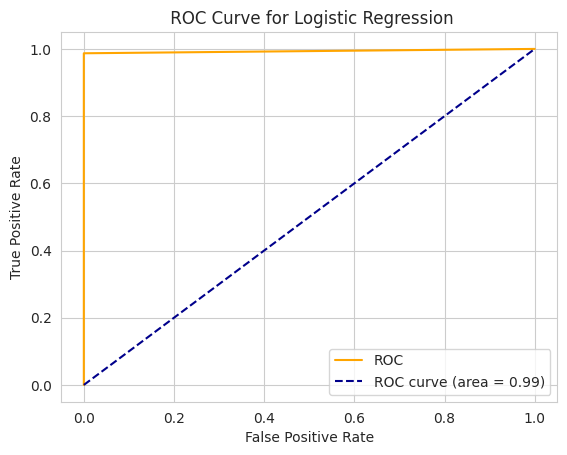

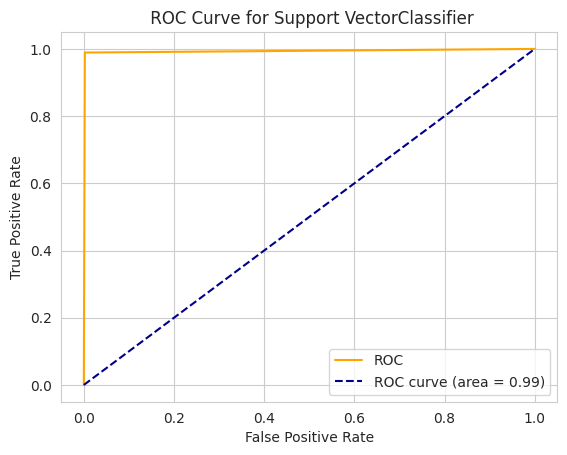

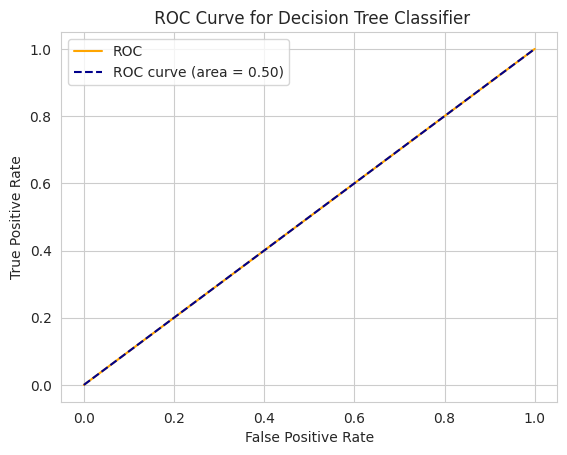

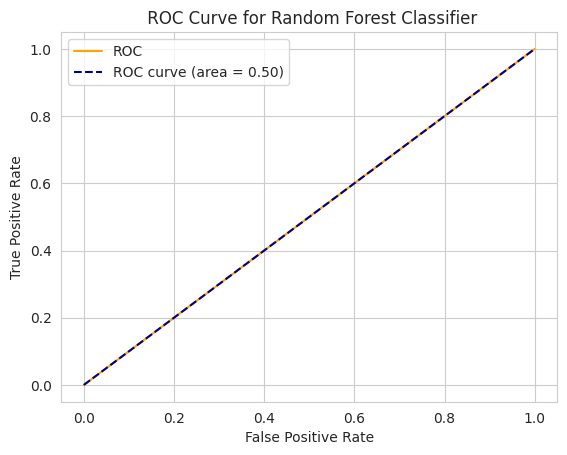

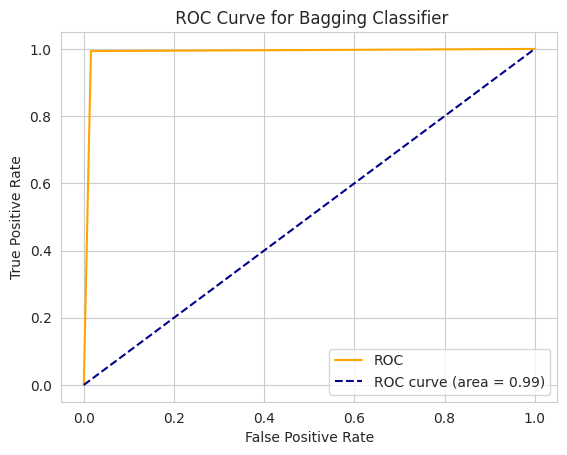

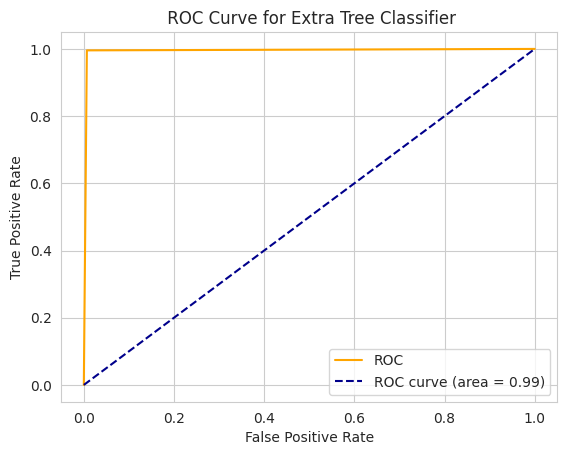

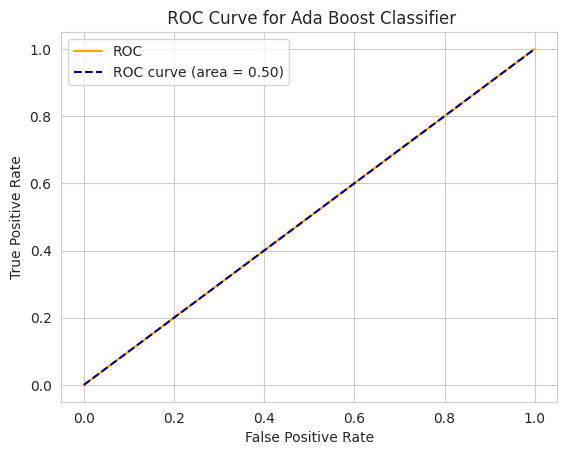

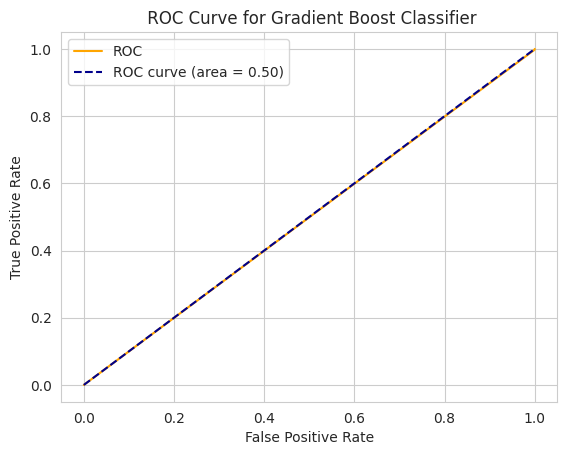

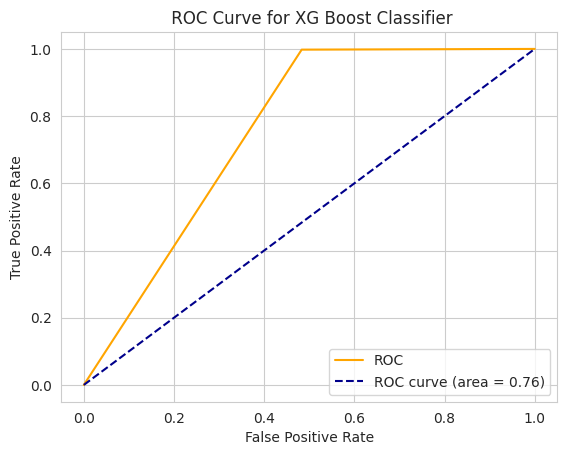

In [38]:
model_list = []
#accuracy score
train_acc_score_list = []
test_acc_score_list = []

#precision score
train_prec_score_list = []
test_prec_score_list = []

#recall score
train_recall_score_list = []
test_recall_score_list = []

#roc_auc score list
train_rocauc_score_list = []
test_rocauc_score_list = []

for i in range(len(models.keys())):
    model = list(models.values())[i]
    model_name = list(models.keys())[i]

    y_train_pred , pred_val = model_trainer(model, x_train, y_train, x_test)

    #model performance on training data
    acc1, prec1, rec1, roc_auc1 = model_evaluator(y_train, y_train_pred)

    #model performance on testing data
    acc, prec, rec, roc_auc = model_evaluator(y_test, pred_val)

    #append values to list
    model_list.append(model_name)
    train_acc_score_list.append(acc1)
    test_acc_score_list.append(acc)
    train_prec_score_list.append(prec1)
    test_prec_score_list.append(prec)
    train_recall_score_list.append(rec1)
    test_recall_score_list.append(rec)
    train_rocauc_score_list.append(roc_auc1)
    train_rocauc_score_list.append(roc_auc)

    #plot roc_curve

    fpr, tpr, thresholds = roc_curve(y_test, pred_val)
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0,1],[0,1], color='darkblue', linestyle='--', label = 'ROC curve (area = %0.2f)'%roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(" ROC Curve for {}".format(model_name))
    plt.legend()
    plt.show()


In [39]:
all_model = pd.DataFrame(list(zip( model_list,train_acc_score_list,test_acc_score_list,train_prec_score_list,
                                  test_prec_score_list,train_recall_score_list,test_recall_score_list,
                                  train_rocauc_score_list,train_rocauc_score_list)),
                        columns = ['Model','Train_Accuracy','Test_Accuracy',
                                   'Train_Precision','Test_Precision',
                                  'Train_Recall','Test_Recall',
                                   'Train_RocAuc','Test_RocAuc']).sort_values(by='Test_Accuracy',ascending=False).reset_index()

all_model.drop('index', axis=1, inplace=True)
all_model

Model  Train_Accuracy  Test_Accuracy  Train_Precision  \
0      Extra Tree Classifier           1.000          0.994              1.0   
1        Logistic Regression           0.996          0.993              1.0   
2   Support VectorClassifier           0.995          0.993              1.0   
3         Bagging Classifier           0.999          0.989              1.0   
4        XG Boost Classifier           1.000          0.762              1.0   
5   Decision Tree Classifier           1.000          0.510              1.0   
6   Random Forest Classifier           1.000          0.510              1.0   
7       Ada Boost Classifier           1.000          0.510              1.0   
8  Gradient Boost Classifier           1.000          0.509              1.0   

   Test_Precision  Train_Recall  Test_Recall  Train_RocAuc  Test_RocAuc  
0           0.994         1.000        0.996         0.500        0.500  
1           1.000         0.992        0.987         0.996        0.996  
2           0.998         0.989        0.989         0.994        0.994  
3           0.985         0.998        0.994         1.000        1.000  
4           0.682         1.000        0.998         0.999        0.999  
5           0.510         1.000        1.000         0.995        0.995  
6           0.510         1.000        1.000         0.993        0.993  
7           0.510         1.000        1.000         1.000        1.000  
8           0.509         1.000        0.998         0.500        0.500

##Based on these metrics, we can assess the performance of each model in terms of its ability to accurately predict whether a failure of a Scania Truck component is related to the APS or not. Models with higher accuracy, precision, recall, and ROC AUC scores are generally considered better performers.
